# Medical Insurance Dataset

In [1]:
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import shapiro, kstest, normaltest, zscore, skew

import json
import pickle

# To avoid warning
import warnings
warnings.filterwarnings("ignore")

# 1. Problem Statement

# 2. Data Gathering

In [2]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 3. Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### 3.1 age

In [6]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [7]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

### 3.2 sex

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
dict(df['sex'].value_counts())

{'male': 676, 'female': 662}

In [10]:
sex_value={'male': 0, 'female': 1}

In [11]:
df['sex'].replace({'male': 0, 'female': 1}, inplace=True)
df['sex']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64

In [12]:
sex_values={'male': 0, 'female': 1}

### 3.3 bmi

In [13]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [14]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

### 3.4 children

In [15]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [16]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### 3.5 smoker

In [17]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
dict(df['smoker'].value_counts())

{'no': 1064, 'yes': 274}

In [19]:
df['smoker'].replace({'no': 0, 'yes': 1},inplace=True)

In [20]:
smoker_value={'no': 0, 'yes': 1}

In [21]:
smoker_values={'no': 0, 'yes': 1}

### 3.6 region

In [22]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [24]:
df=pd.get_dummies(df,columns=['region'])

### 3.7 charges 

In [25]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [26]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [27]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


# 4. Feature Engineering

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

### 4.1 age

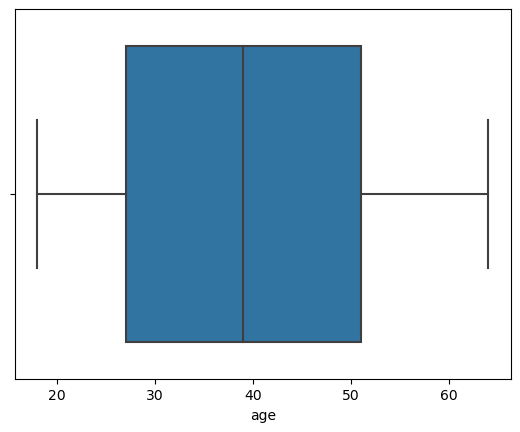

In [30]:
sns.boxplot(x= df['age'])
plt.show()

In [31]:
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.50)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
mean = df['age'].mean()
median = df['age'].median()

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)
print("Mean:", mean)
print("Median:", median)

Q1 : 27.0
Q2 : 39.0
Q3 : 51.0
upper_tail : 87.0
lower_tail : -9.0
Mean: 39.20702541106129
Median: 39.0


### 4.2 sex

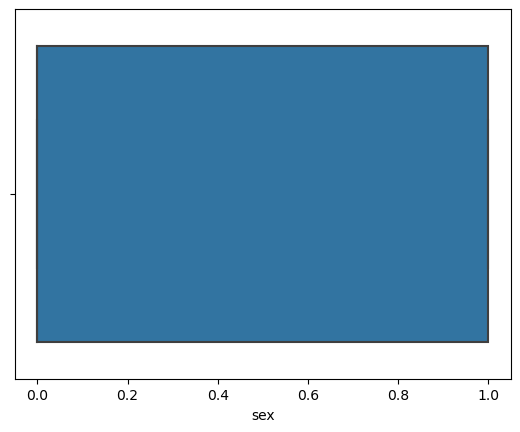

In [32]:
sns.boxplot(x= df['sex'])
plt.show()

In [33]:
q1 = df['sex'].quantile(0.25)
q2 = df['sex'].quantile(0.50)
q3 = df['sex'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
mean = df['sex'].mean()
median = df['sex'].median()

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)
print("Mean:", mean)
print("Median:", median)

Q1 : 0.0
Q2 : 0.0
Q3 : 1.0
upper_tail : 2.5
lower_tail : -1.5
Mean: 0.4947683109118087
Median: 0.0


### 4.3 bmi

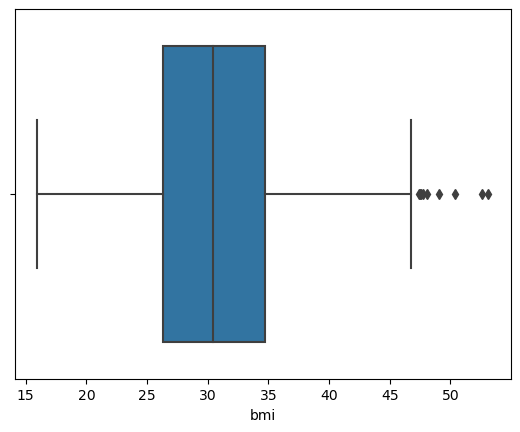

In [34]:
sns.boxplot(x= df['bmi'])
plt.show()

In [35]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
mean = df['bmi'].mean()
median = df['bmi'].median()

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)
print("Mean:", mean)
print("Median:", median)

Q1 : 26.29625
Q2 : 30.4
Q3 : 34.69375
upper_tail : 47.290000000000006
lower_tail : 13.7
Mean: 30.663396860986538
Median: 30.4


In [36]:
df[['bmi']].loc[df['bmi']>upper_tail]

,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38
860,47.60
1047,52.58
1088,47.74
1317,53.13


In [37]:
df.loc[(df['bmi']>upper_tail),'bmi'] = upper_tail

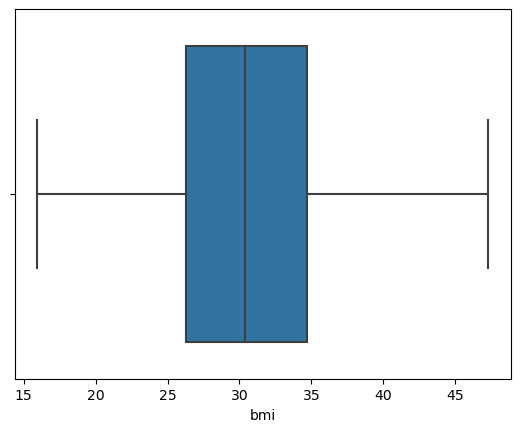

In [38]:
sns.boxplot(x= df['bmi'])
plt.show()

### 4.4 children

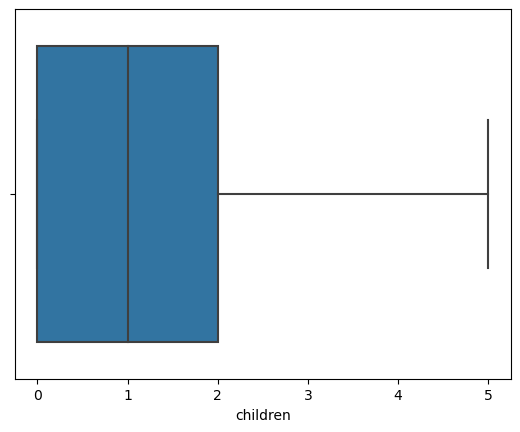

In [39]:
sns.boxplot(x= df['children'])
plt.show()

In [40]:
q1 = df['children'].quantile(0.25)
q2 = df['children'].quantile(0.50)
q3 = df['children'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
mean = df['children'].mean()
median = df['children'].median()

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)
print("Mean:", mean)
print("Median:", median)

Q1 : 0.0
Q2 : 1.0
Q3 : 2.0
upper_tail : 5.0
lower_tail : -3.0
Mean: 1.0949177877429
Median: 1.0


### 4.5 smoker

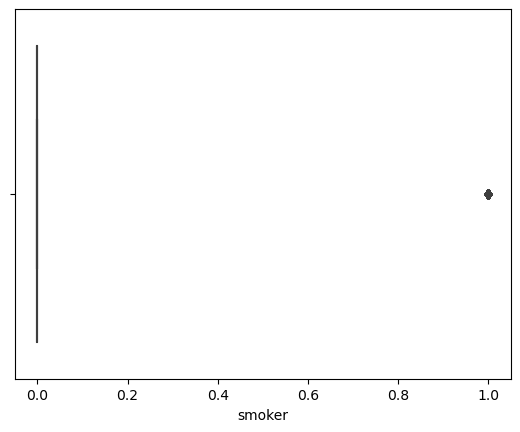

In [41]:
sns.boxplot(x= df['smoker'])
plt.show()

In [42]:
q1 = df['smoker'].quantile(0.25)
q2 = df['smoker'].quantile(0.50)
q3 = df['smoker'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
mean = df['smoker'].mean()
median = df['smoker'].median()

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)
print("Mean:", mean)
print("Median:", median)

Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
upper_tail : 0.0
lower_tail : 0.0
Mean: 0.20478325859491778
Median: 0.0


### 4.6 charges

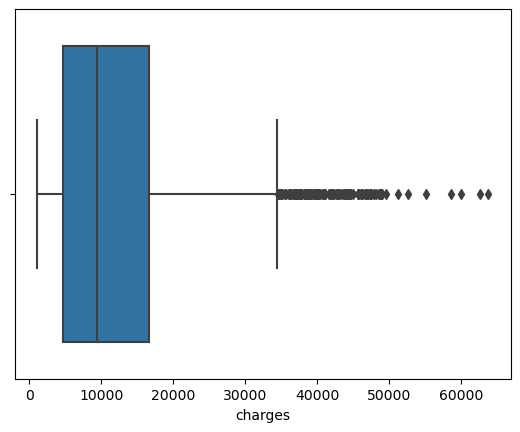

In [43]:
sns.boxplot(x= df['charges'])
plt.show()

In [44]:
q1 = df['charges'].quantile(0.25)
q2 = df['charges'].quantile(0.50)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
mean = df['charges'].mean()
median = df['charges'].median()

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)
print("Mean:", mean)
print("Median:", median)

Q1 : 4740.28715
Q2 : 9382.033
Q3 : 16639.912515
upper_tail : 34489.350562499996
lower_tail : -13109.1508975
Mean: 13270.422265141257
Median: 9382.033


# 5. Feature Selection

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


## 1) Linearity

In [46]:
corr=df.corr()[['charges']]
corr

,charges
age,0.299008
sex,-0.057292
bmi,0.198997
children,0.067998
smoker,0.787251
charges,1.000000
region_northeast,0.006349
region_northwest,-0.039905
region_southeast,0.073982
region_southwest,-0.043210


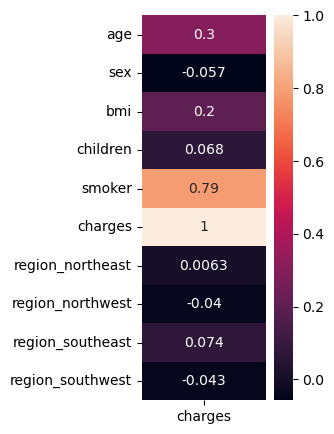

In [47]:
plt.figure(figsize=(2,5))
sns.heatmap(corr,annot=True)
plt.show()

## 2) No-Multicolinearity

In [48]:
vif_list = []
x = df.drop("charges", axis=1)
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x,i)
    vif_list.append(vif)
vif_list

[1.0174619308223145,
 1.0087553624732215,
 1.1064200096251202,
 1.0040334014255623,
 1.0120840759479972,
 8.865149827585912,
 8.91160479430872,
 11.842297441785252,
 9.498543764746326]

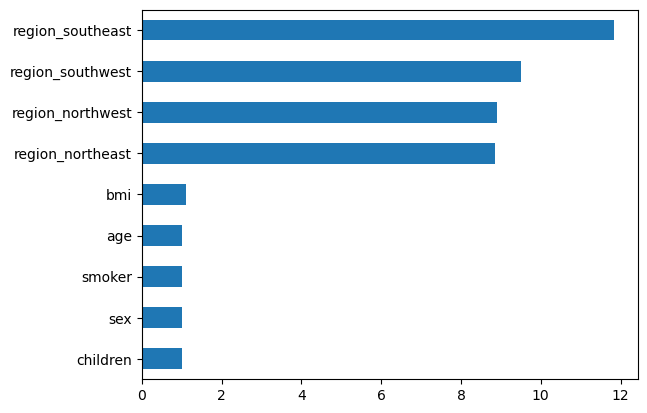

In [49]:
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind = "barh")
plt.show()

# 6 Model Building

In [50]:
x=df.drop(['charges'], axis=1)
y=df['charges']

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=12)

## 6.1 Linear Regression Model

In [52]:
linear_model=LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [53]:
linear_model.coef_

array([  261.44658888,    56.27442016,   343.75148376,   406.09626429,
       23853.11221434,   385.21768814,    85.74168938,  -302.25768432,
        -168.7016932 ])

In [54]:
linear_model.intercept_

-12886.500759700084

#### Model Evaluation of Linear Regression

In [55]:
# Evaluation of Training Data

y_pred_train=linear_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE=",mae)

r_squared_value=r2_score(y_train,y_pred_train)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_train.shape[0]-1))/
        (x_train.shape[0]-1-x_train.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 35236170.2234276
RMSE= 5936.006251970057
MAE= 4146.840595966165
R2_Score= 0.760570704937222
Adj_R2_Score= 0.7585378146961229


In [56]:
# Evaluation of Testing Data

y_pred_test=linear_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE=",mae)

r_squared_value=r2_score(y_test,y_pred_test)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_test.shape[0]-1))/
        (x_test.shape[0]-1-x_test.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 41709925.831768945
RMSE= 6458.322214923079
MAE= 4321.048727460817
R2_Score= 0.7103707081881969
Adj_R2_Score= 0.7002673607994131


## 3) Normality of Residuals

In [57]:
Residuals=y_train-y_pred_train

#### 3.1 KDE Plot

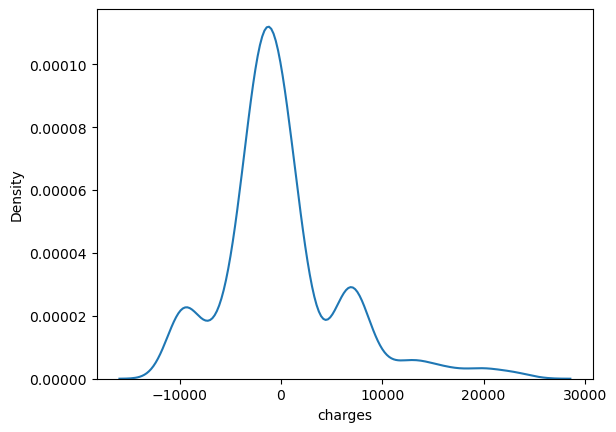

In [58]:
sns.kdeplot(Residuals)
plt.show()

In [59]:
skewness=skew(Residuals)
skewness

1.1282316398792205

#### 3.2 Hypothesis Testing

##### Shapiro Test

In [60]:
_,p_val=shapiro(Residuals)
print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 9.028639277999315e-25
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


##### KS Test

In [61]:
_,p_val=kstest(Residuals, 'norm')
print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 0.0
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


##### Normal Test

In [62]:
_,p_val=normaltest(Residuals)
print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 8.72115320261946e-48
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


#### 3.3 Q-Q Plot

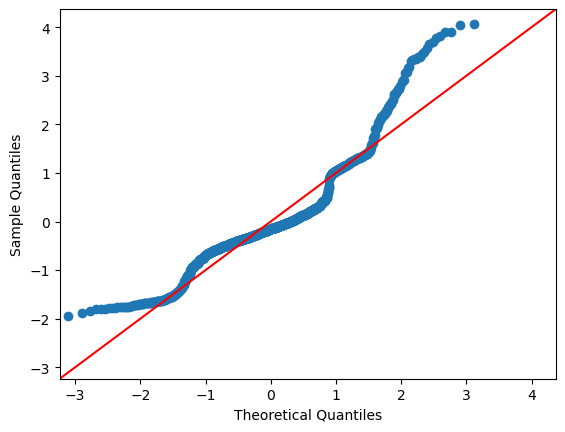

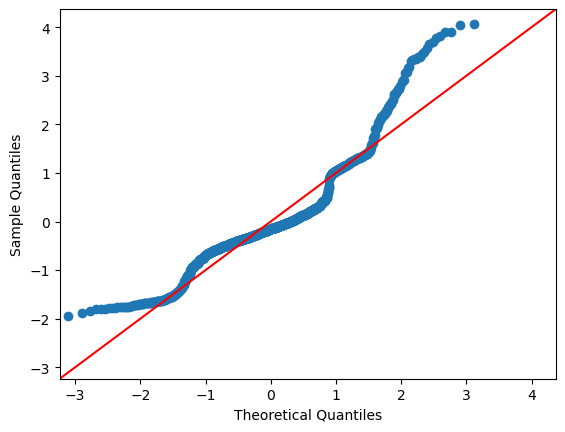

In [63]:
import statsmodels.api as sm

sm.qqplot(Residuals, line='45', fit=True)

## 4) Homoscedasticity

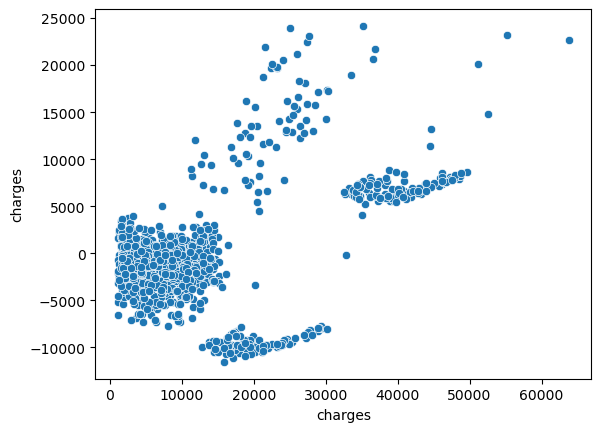

In [64]:
sns.scatterplot(x=y_train, y=Residuals)
plt.show()

## 6.2 Ridge Regression Model

In [65]:
# Create Instance
ridge_model=Ridge(alpha=1.0)    # alpha=1.0 bydefault in Ridge and Lasso

# Model Fitting
ridge_model.fit(x_train,y_train)

Ridge()

In [66]:
ridge_model.coef_

array([  261.31086574,    48.38170213,   343.61466619,   406.52334068,
       23717.8767065 ,   386.61175767,    81.95848672,  -297.66218282,
        -170.90806157])

In [67]:
ridge_model.intercept_

-12845.398830051097

#### Model Evaluation of Ridge Regression

In [68]:
# Evaluation of Training Data

y_pred_train=ridge_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE=",mae)

r_squared_value=r2_score(y_train,y_pred_train)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_train.shape[0]-1))/
        (x_train.shape[0]-1-x_train.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 35239168.869922146
RMSE= 5936.25882774009
MAE= 4157.0152211279565
R2_Score= 0.7605503291752769
Adj_R2_Score= 0.7585172659324254


In [69]:
# Evaluation of Testing Data

y_pred_test=ridge_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE=",mae)

r_squared_value=r2_score(y_test,y_pred_test)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_test.shape[0]-1))/
        (x_test.shape[0]-1-x_test.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 41710755.10282142
RMSE= 6458.386416344366
MAE= 4328.939725517464
R2_Score= 0.7103649498181481
Adj_R2_Score= 0.7002614015559905


## 6.3 Lasso Regression Model 

In [70]:
# Create Instance
lasso_model=Lasso(alpha=1.0)    # alpha=1.0 bydefault in Ridge and Lasso

# Model Fitting
lasso_model.fit(x_train,y_train)

Lasso()

In [71]:
lasso_model.coef_

array([  261.45520289,    51.68241767,   343.55331453,   405.42968053,
       23846.57186308,   546.9670468 ,   246.92560366,  -132.34446151,
          -0.        ])

In [72]:
lasso_model.intercept_

-13041.98099793219

#### Model Evaluation of Lasso Regression

In [73]:
# Evaluation of Training Data

y_pred_train=lasso_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE=",mae)

r_squared_value=r2_score(y_train,y_pred_train)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_train.shape[0]-1))/
        (x_train.shape[0]-1-x_train.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 35236196.56004491
RMSE= 5936.008470348143
MAE= 4147.319475820372
R2_Score= 0.7605705259802673
Adj_R2_Score= 0.7585376342197224


In [74]:
# Evaluation of Testing Data

y_pred_test=lasso_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE=",mae)

r_squared_value=r2_score(y_test,y_pred_test)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_test.shape[0]-1))/
        (x_test.shape[0]-1-x_test.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 41717493.51686077
RMSE= 6458.908074656332
MAE= 4321.18931242825
R2_Score= 0.7103181589872551
Adj_R2_Score= 0.7002129784868105


## 6.4 Hyperparameter Tunning

### Hyperparameter Tunning for Ridge Regression Model

#### 1) GridSearchCV

In [75]:
ridge_model = Ridge()   # Model instance

param_grid = {"alpha": np.arange(0.01,3,0.01)}   # Defined param_grid

gscv_ridge_model = GridSearchCV(ridge_model, param_grid, n_jobs=-1)

gscv_ridge_model.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [76]:
gscv_ridge_model.best_estimator_

Ridge(alpha=0.49)

#### Model Evaluation of GridSearchCV Ridge Regression

In [77]:
y_pred_train=gscv_ridge_model.fit(x_train, y_train).predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE=",mae)

r_squared_value=r2_score(y_train,y_pred_train)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_train.shape[0]-1))/
        (x_train.shape[0]-1-x_train.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 35236894.402645804
RMSE= 5936.067250515765
MAE= 4151.82239467858
R2_Score= 0.7605657841493323
Adj_R2_Score= 0.7585328521279587


In [78]:
# Evaluation of Testing Data

y_pred_test=gscv_ridge_model.fit(x_train, y_train).predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE=",mae)

r_squared_value=r2_score(y_test,y_pred_test)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_test.shape[0]-1))/
        (x_test.shape[0]-1-x_test.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 41709650.3559619
RMSE= 6458.300887691893
MAE= 4324.926233485108
R2_Score= 0.710372621062922
Adj_R2_Score= 0.7002693404023261


#### 2) RandomizedSearchCV 

In [79]:
# Model instance
ridge_model = Ridge()

# Defined param_grid
param_grid = {"alpha": np.arange(0.01,3,0.01)}

rscv_ridge_model = RandomizedSearchCV(ridge_model, param_grid, n_jobs=-1)

rscv_ridge_model.fit(x_train, y_train)

RandomizedSearchCV(estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [80]:
rscv_ridge_model.best_estimator_

Ridge(alpha=0.53)

#### Model Evaluation of RandomizedSearchCV Ridge Regression

In [81]:
y_pred_train=rscv_ridge_model.fit(x_train, y_train).predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE=",mae)

r_squared_value=r2_score(y_train,y_pred_train)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_train.shape[0]-1))/
        (x_train.shape[0]-1-x_train.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 35237327.912723124
RMSE= 5936.103765326472
MAE= 4153.148912676109
R2_Score= 0.7605628384542821
Adj_R2_Score= 0.7585298814222902


In [82]:
# Evaluation of Testing Data

y_pred_test=rscv_ridge_model.fit(x_train, y_train).predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE=",mae)

r_squared_value=r2_score(y_test,y_pred_test)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_test.shape[0]-1))/
        (x_test.shape[0]-1-x_test.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 41709667.097136684
RMSE= 6458.302183789226
MAE= 4325.084052220122
R2_Score= 0.7103725048139835
Adj_R2_Score= 0.7002692200981923


### Hyperparameter Tunning for Lasso Regression Model

#### 1) GridSearchCV

In [83]:
lasso_model = Lasso() # Model instance

param_grid = {"alpha": np.arange(0.01,3,0.01)} # Defined param_grid

gscv_lasso_model = GridSearchCV(lasso_model, param_grid)

gscv_lasso_model.fit(x_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [84]:
gscv_lasso_model.best_estimator_

Lasso(alpha=2.9899999999999998)

#### Model Evaluation of GridSearchCV Lasso Regression

In [85]:
# Evaluation of Training Data

y_pred_train=gscv_lasso_model.fit(x_train, y_train).predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE=",mae)

r_squared_value=r2_score(y_train,y_pred_train)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_train.shape[0]-1))/
        (x_train.shape[0]-1-x_train.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 35236421.81933188
RMSE= 5936.027444287289
MAE= 4148.27171093928
R2_Score= 0.7605689953464913
Adj_R2_Score= 0.7585360905899992


In [86]:
# Evaluation of Testing Data

y_pred_test=gscv_lasso_model.fit(x_train, y_train).predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE=",mae)

r_squared_value=r2_score(y_test,y_pred_test)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_test.shape[0]-1))/
        (x_test.shape[0]-1-x_test.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 41734089.263767086
RMSE= 6460.192664601195
MAE= 4321.428860467424
R2_Score= 0.7102029198846264
Adj_R2_Score= 0.7000937194154855


#### 2) RandomizedSearchCV

In [87]:
lasso_model = Lasso()

param_grid = {"alpha": np.arange(0.01,3,0.01)}

rscv_lasso_model = RandomizedSearchCV(lasso_model, param_grid, n_jobs=-1)

rscv_lasso_model.fit(x_train, y_train)

RandomizedSearchCV(estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [88]:
rscv_lasso_model.best_estimator_

Lasso(alpha=2.61)

#### Model Evaluation of RandomizedSearchCV Ridge Regression

In [89]:
# Evaluation of Training Data

y_pred_train=rscv_lasso_model.fit(x_train, y_train).predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE=",mae)

r_squared_value=r2_score(y_train,y_pred_train)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_train.shape[0]-1))/
        (x_train.shape[0]-1-x_train.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 35236393.56633971
RMSE= 5936.025064497261
MAE= 4148.189012578243
R2_Score= 0.7605691873251869
Adj_R2_Score= 0.7585362841987026


In [90]:
# Evaluation of Testing Data

y_pred_test=rscv_lasso_model.fit(x_train, y_train).predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE=",mse)

rmse=np.sqrt(mse)
print("RMSE=",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE=",mae)

r_squared_value=r2_score(y_test,y_pred_test)
print("R2_Score=",r_squared_value)

adj_r2=1-(((1-r_squared_value)*(x_test.shape[0]-1))/
        (x_test.shape[0]-1-x_test.shape[1]))
print("Adj_R2_Score=",adj_r2)

MSE= 41734005.33003336
RMSE= 6460.186168372655
MAE= 4321.427656708433
R2_Score= 0.7102035027115524
Adj_R2_Score= 0.7000943225735833


In [91]:
x.head(1).T

,0
age,19.0
sex,1.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [92]:
column_names = x.columns
len(column_names)

9

#### Storring the feature names, label encoded values in JSON file

In [93]:
json_data = {"sex":sex_value, 
            "smoker":smoker_value,
            "columns":list(column_names)}
json_data

{'sex': {'male': 0, 'female': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [94]:
with open("Project_data.json", "w") as f:
    json.dump(json_data, f)

#### Storring fitted model in pickle file

In [95]:
with open("Linear model.pkl", "wb") as f:
    pickle.dump(linear_model, f)

### Prediction on User entered value for testing

In [96]:
age = 35.0
sex = "male"
bmi = 29.9
children = 1.0
smoker = "no"
region = "northwest"

#### Conversion for One-Hot Encoded values

In [97]:
# input for one-hot encodding
region = "region_" + region

# index of one-hot encodded columns
region_index = np.where(column_names == region)[0][0]
# or
region_index = list(column_names).index(region)
region_index

6

#### Creating array of user input values

In [99]:
test_array = np.zeros(len(column_names))

# Note: put feature values in front of correct feature index
test_array[0] = age
test_array[1] = json_data['sex'][sex] #label encodded
test_array[2] = bmi
test_array[3] = children
test_array[4] = json_data['smoker'][smoker] #label encodded
test_array[region_index] = 1 # one-hot encodded

test_array

array([35. ,  0. , 29.9,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ])

### Prediction Output

In [100]:
charges = linear_model.predict([test_array])[0]

print("Predicted Medical Insurance Charges is:",round(charges,2),'/- Rs.')

Predicted Medical Insurance Charges is: 7034.14 /- Rs.
